In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 2.6 从 JSON 数据源导入数据 の 工作原理
## 2.6.3 工作原理
1. 使用 requests 模块获取远程数据资源 (requests 模块提供简单的 API 来定义 HTTP 谓词，我们只需要发出 get() 方法调用，获取数据和请求元数据后，将他们封装到 Response 对象，以供进一步处理)
2. 利用 Response.json() 方法将读取 Response.content 的内容 将它解析成 JSON 同时加载到 JSON 对象中
3. 利用已有 JSON 对象 处理数据

# 2.7 导出数据到 JSON CSV Excel
## 2.7.3 工作原理
1. 导入定宽数据集合 接着导出至 stdot 然后将之存到文件
2. 从命令行执行程序 给定两个必选参数：输入文件名 nad 导出文件格式
3. 解析这些参数好 将输入文件分派给 import_data 方法 (该方法返回 Python 数据结构<列表的列表> 则得到对其进行操作并得到合适的输出格式)
4. 在 write_dara() 方法中 只是将请求由给合适的方法 write_csv ,json , xlsx
5. 在 CSV 中 得到一个 csv.writer() instance 然后将迭代过得每一行数据写入 之后将要把输出从我们的程序重定向到另一个程序 (或者仅仅是对文件执行 cat 操作) so 仅仅是简单的返回给定的字符串
6. json 模块 提供的 dump 方法 可很轻松地读取 python 数据结构
7. 最后将 Book instance 保存成文件流 这样就可将之返回给 stdout 后既可以将内容读取到文件中 亦可让 web service 来使用

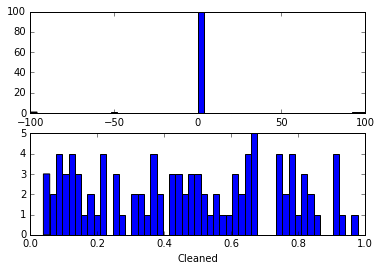

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def is_outlier(points,threshold=3.5):
	'''
	Return a boolean array with True id points asr outliers and False otherwise

	Data points with a modified z-score greater than this
	# value will be calssified as outlier
	'''
	# transform into vector
	if len(points.shape) == 1:
		points = points[:,None]
	# compute median value
	median = np.median(points,axis=0)
	# compute diff sums along the axis
	diff = np.sum((points - median) ** 2,axis=1)
	diff = np.sqrt(diff)
	# compute MAD
	med_abs_deviation = np.median(diff)

	# compute modified Z-score
	# http://www.itl.nist.gov/dic898/handbook/eda/section4/eda43.htm#
	# Inlewicz
	modified_z_score = 0.6745 * diff / med_abs_deviation

	# return a mask for each outlier
	return modified_z_score > threshold

# Random data
x = np.random.random(100)
# histogram buckets
buckets = 50

# Add in a few outliers
x = np.r_[x,-49,95,100,-100]

# Keep valid data points
# Note here that
# '~' is logical NOT on boolean numpy arrays
filtered = x[~is_outlier(x)]

# plot histograms
plt.figure()

plt.subplot(211)
plt.hist(x,buckets)
plt.xlabel('Raw')

plt.subplot(212)
plt.hist(filtered,buckets)
plt.xlabel('Cleaned')

plt.show()

In [4]:
~numpy.array(False)

True

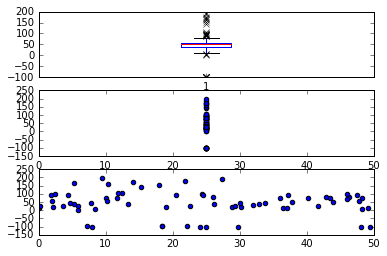

In [7]:
from pylab import *

# fake up some data
spread = rand(50) * 100
center = ones(50) * 50

# generate some outliers high and low
flier_high = rand(10) * 100 + 100
flier_low = rand(10) - 100

# merge generated data set
data = concatenate((spread,center,flier_high,flier_low),0)

subplot(311)
# basic plot
# 'gx' defining the outlier plotting properties
boxplot(data,0,'gx')
# compare this with similar scatter plot
subplot(312)
spread_1 = concatenate((spread,flier_high,flier_low),0)
center_1 = ones(70) * 25
scatter(center_1,spread_1)
xlim([0,50])

# and with another that is more appropriate fo scatter plot
subplot(313)
center_2 = rand(70) * 50
scatter(center_2,spread_1)
xlim([0,50])
show()

### 上述 code and figure
1. figure 1 可以看出其中由 X 形状标记标识出的异常值
2. figure 2 以散点图形式显示相似的数据集合 (因为 数据的 X 轴坐标取值都是 25) [无法区分 负向异常值 inlier and 正向异常值 outlier]
3. figure 3 在 X 轴上生成 分布 0--50 的范围内 可容易看出值与值之间的不同 同时在 Y 轴上可看出异常值

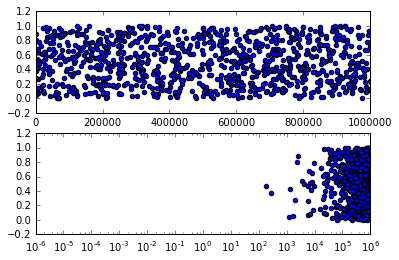

In [8]:
# generate uniform data points
x = 1e6 * rand(1000)
y = rand(1000)

figure()

subplot(211)
# make scatter plot
scatter(x,y)
# limit x axis
xlim(1e-6,1e6)

subplot(212)
scatter(x,y)
# BUT make x axis logarithmic
xscale('log')
xlim(1e-6,1e6)

show()

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


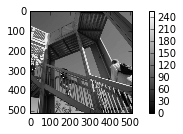

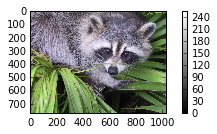

In [12]:
import scipy.misc
import matplotlib.pyplot as plt

# load already prepared ndarray from scipy
subplot(211)
ascent = scipy.misc.ascent()
plt.gray()
plt.imshow(ascent)
plt.colorbar()
plt.show()
subplot(212)
face = scipy.misc.face()
# set the default colormap to gray
plt.gray()
plt.imshow(face)
plt.colorbar()
plt.show()

#### 显示 Face AND Ascent 图 の 灰度图 AND 坐标轴 颜色条显示了图像值的范围

In [13]:
print(face.shape,'\n',face.max(),'\n',face.dtype)
print(ascent.shape,'\n',ascent.max(),'\n',ascent.dtype)

(768, 1024, 3) 
 255 
 uint8
(512, 512) 
 255 
 int32


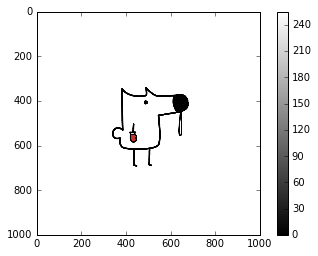

In [17]:
# 利用 Python Image Library Read Image
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

bug = Image.open('head_image_zhihu.jpg')
arr = np.array(bug.getdata(),numpy.uint8).reshape(bug.size[1],bug.size[0],3)
plt.gray()
plt.imshow(arr)
plt.colorbar()
plt.show()

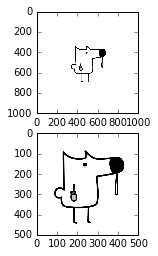

In [19]:
bug = scipy.misc.imread('head_image_zhihu.jpg')

# if want to inspect the shape of the loaded image
# uncomment following line
# print bug.shape

# the original image is RGB having values for all three
# channels separately need to convert that to freyscale image
# by picking up just one channel

# covert to gray
bug = bug[:,:,0]
# show original image
plt.figure()
plt.gray()

plt.subplot(211)
plt.imshow(bug)

# show 'zoomed' region
zbug = bug[250:750,250:750]
plt.subplot(212)
plt.imshow(zbug)

plt.show()

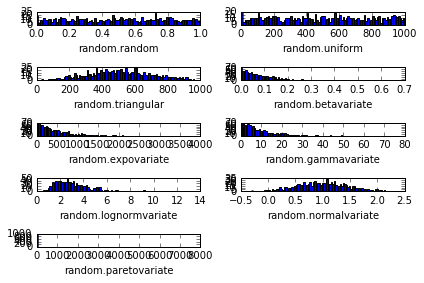

In [23]:
import random
import matplotlib
import matplotlib.pyplot as plt

SAMPLE_SIZE = 1000
#  histogram buckets
buckets = 100

plt.figure()

# need to update font size just for this example
# matplotlib.rcParams.update({'font.size':7})

# Figure 1 在 [0,1] 之间分布的随机变量
plt.subplot(521)
plt.xlabel('random.random')
# Return the next random floating point number in the range [0.0,1.0]
res = [random.random() for _ in range(1,SAMPLE_SIZE)]
plt.hist(res,buckets)

# Figure 2 均匀分布的随机变量
plt.subplot(522)
plt.xlabel('random.uniform')
# Return a random floating point number N such that a <= N <= b for a <=b and b <= N for b < a
# The end_point value b may or may not included in the range depending on floating_point rounding in the equation a + (b - a) * random()
a = 1
b = SAMPLE_SIZE
res = [random.uniform(a,b) for _ in range(1,SAMPLE_SIZE)]
plt.hist(res,buckets)

# Figure 3 三角形分布
plt.subplot(523)
plt.xlabel('random.triangular')
# Return a random floating point number N such that low <= N <= high and with the specified
# mode between those bounds The los and high bounds default to zero and one The mode
# argument defaults to the midpoint between the bounds giving a symmentric distribution
low = 1
high = SAMPLE_SIZE
res = [random.triangular(low,high) for _ in range(1,SAMPLE_SIZE)]
plt.hist(res,buckets)

# Figure 4 beta 分布
plt.subplot(524)
plt.xlabel('random.betavariate')
alpha = 1
beta = 10
res = [random.betavariate(alpha,beta) for _ in range(1,SAMPLE_SIZE)]
plt.hist(res,buckets)

# Figure 5 指数分布
plt.subplot(525)
plt.xlabel('random.expovariate')
lambd = 1.0 / ((SAMPLE_SIZE + 1) / 2.)
res = [random.expovariate(lambd) for _ in range(1,SAMPLE_SIZE)]
plt.hist(res,buckets)

# Figure 6 gamma 分布
plt.subplot(526)
plt.xlabel('random.gammavariate')
alpha = 1
beta = 10
res = [random.gammavariate(alpha,beta) for _ in range(1,SAMPLE_SIZE)]
plt.hist(res,buckets)

# Figure 7 对数正态分布
plt.subplot(527)
plt.xlabel('random.lognormvariate')
mu = 1
sigma = 0.5
res = [random.lognormvariate(mu,sigma) for _ in range(1,SAMPLE_SIZE)]
plt.hist(res,buckets)

# Figure 8 正态分布
plt.subplot(528)
plt.xlabel('random.normalvariate')
mu = 1
sigma = 0.5
res = [random.normalvariate(mu,sigma) for _ in range(1,SAMPLE_SIZE)]
plt.hist(res,buckets)

# Figure 9 帕累托分布
plt.subplot(529)
plt.xlabel('random.paretovariate')
alpha = 1
res = [random.paretovariate(alpha) for _ in range(1,SAMPLE_SIZE)]
plt.hist(res,buckets)

plt.tight_layout()
plt.show()

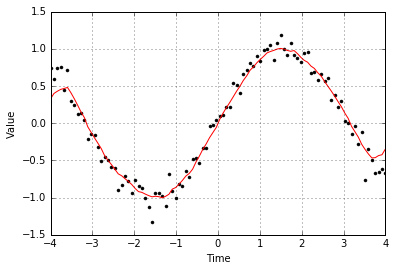

In [26]:
from pylab import *
from numpy import *


def moving_average(interval,window_size):
    '''
    Compute convoluted window for given size
    '''
    window = ones(int(window_size)) / float(window_size)
    return convolve(interval,window,'same')

t = linspace(-4,4,100)
y = sin(t) + randn(len(t)) * 0.1

plot(t,y,'k.')

# compute moving average
y_av = moving_average(y,10)
plot(t,y_av,'r')
# xlim(0,100)
xlabel('Time')
ylabel('Value')
grid(True)
show()

ValueError: x and y must not be None

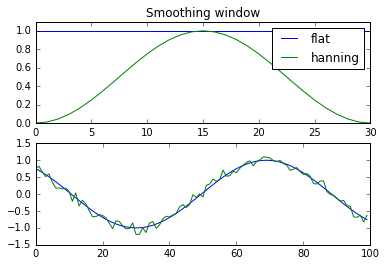

In [30]:
import numpy
from numpy import *
from pylab import *

# possiable window type

# WINDOWS = ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']
# want to see just two window type comment previoys line
# and uncomment the following one
WINDOWS = ['flat','hanning']


def smooth(x, window_len=11, window='hanning'):
    '''
    Smooth the data using a window with requested size
    Return smothed signal

    x -- input signal
    window_len -- length of smoothing window
    window -- type of window: 'flat','hanning','hamming','bartlett','blackman'
    flat window will produce a moving average smoothing
    '''
    if x.ndim != 1:
        raise ValueError('Smooth only accepts 1 dimension arrays')
    if x.size < window_len:
        raise ValueError('Input vector needs to be bigger than window size')
    if window_len < 3:
        return x
    if not window in WINDOWS:
        raise ValueError(
            'Window is one of [flat][hanning][hamming][bartlett][blackman]')
    # adding reflected window in front and at the end
    s = numpy.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]
    # pick windows type and da averaging
    if window == 'flat':    # moving average
        w = numpy.ones(window_len, 'd')
    else:
        # call appropriate func in numpy
        w = eval('numpy.' + window + '(window_len)')
        # NOTE: length(output) != length(input), to correct this:
        # return y[(window_len/2-1):-(window_len/2)] instead of just y.
        y = numpy.convolve(w/w.sum(), s, mode='vaild')
        return y

# Get some evently spaced numbers over a specified interval
t = linspace(-4, 4, 100)
# Make some noisy sinusoidal
x = sin(t)
xn = x + randn(len(t))*0.1

# Smooth it
y = smooth(x)

# windows
ws = 31

subplot(211)
plot(ones(ws))

# draws on the same axes
hold(True)

# plot for every windows
for w in WINDOWS[1:]:
    eval('plot('+w+'(ws))')
# configure axis properties
axis([0, 30, 0, 1.1])

# add legend for every window
legend(WINDOWS)

title('Smoothing window')

# add second plot
subplot(212)

# draw original signal
plot(x)

# and signal with added noise
plot(xn)

# smooth signal with noise for every possiable windowing algorithm
for w in WINDOWS:
    plot(smooth(xn, 10, w))
# add legend for every graph
l = ['original signal', 'signal with noise']
l.extend(WINDOWS)
legend(l)

title('Smoothed signal')

show()

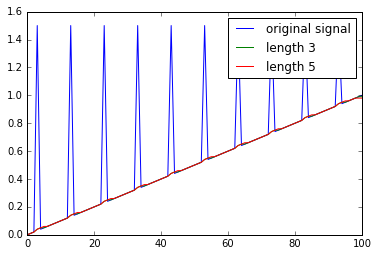

In [31]:
import numpy as np
import pylab as p
import scipy.signal as signal

# get some linear data
x = np.linspace(0,1,101)

# add some noisy signal
x[3::10] = 1.5

p.plot(x)
p.plot(signal.medfilt(x,3))
p.plot(signal.medfilt(x,5))

p.legend(['original signal','length 3','length 5'])
p.show()